In [175]:
from distribution import Distribution
from model import Model
import torch
from matplotlib import pyplot as plt
import numpy as np

In [2]:
mean_1 = torch.tensor([3.0, 3.0])
variance_1 = torch.tensor([1.0, 0.5])
mean_2 = torch.tensor([-3.0, -3.0])
variance_2 = torch.tensor([0.5, 0.5])
p1_multi = Distribution('p1_multi', [0.5, 0.5], [mean_1, mean_2], [variance_1, variance_2])

In [48]:
model = Model(mode='score', distribution=p1_multi)
model.train(train_iters=6000, batch_size=1000)

Iteration  0
1.7486109733581543
Iteration  1
7.525234699249268
Iteration  2
2.1748695373535156
Iteration  3
2.7560107707977295
Iteration  4
2.543977975845337
Iteration  5
1.8683936595916748
Iteration  6
1.6472742557525635
Iteration  7
1.5241103172302246
Iteration  8
1.6045700311660767
Iteration  9
1.5859977006912231
Iteration  10
1.5860321521759033
Iteration  11
1.495569109916687
Iteration  12
1.5592137575149536
Iteration  13
1.6341569423675537
Iteration  14
1.466841220855713
Iteration  15
1.4402008056640625
Iteration  16
1.4388930797576904
Iteration  17
1.416797161102295
Iteration  18
1.2734432220458984
Iteration  19
1.3958187103271484
Iteration  20
1.1500041484832764
Iteration  21
1.119476318359375
Iteration  22
1.0259779691696167
Iteration  23
1.0093902349472046
Iteration  24
1.0210750102996826
Iteration  25
1.007561445236206
Iteration  26
1.0327283143997192
Iteration  27
1.0134596824645996
Iteration  28
0.9595922231674194
Iteration  29
1.0012575387954712
Iteration  30
0.95162707567

(array([   1,    2,    3, ..., 5998, 5999, 6000]),
 array([1.74861097e+00, 7.52523470e+00, 2.17486954e+00, ...,
        1.09044497e-03, 3.15000000e-03, 5.94097516e-03]))

In [170]:
axis = torch.linspace(-5, 5, steps=10)
X, Y = torch.meshgrid(axis, axis)

In [176]:
Z = torch.zeros((len(X), len(Y), 2))
for i in range(len(X)):
    for j in range(len(Y)):
        Z[i][j] = p1_multi.score(torch.tensor([axis[i], axis[j]]))
U = torch.from_numpy(np.array([Z[:, i, 0] for i in range(len(X))]))
V = torch.from_numpy(np.array([Z[j, :, 1] for i in range(len(Y))]))

In [177]:
Z_pred = torch.zeros((len(X), len(Y), 2))
for i in range(len(X)):
    for j in range(len(Y)):
        pred = model.model.forward(torch.tensor([axis[i], axis[j]]))
        Z_pred[i][j] = torch.tensor([pred[0], pred[1]])
U_pred = torch.from_numpy(np.array([Z_pred[:, i, 0] for i in range(len(X))]))
V_pred = torch.from_numpy(np.array([Z_pred[j, :, 1] for i in range(len(Y))]))

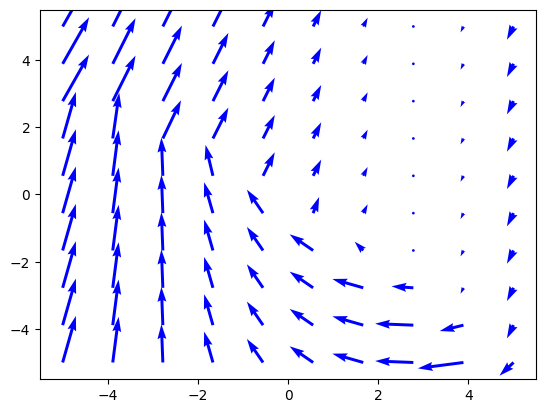

In [178]:
plt.quiver(Y, X, U, V, color='b', label='Ground Truth')

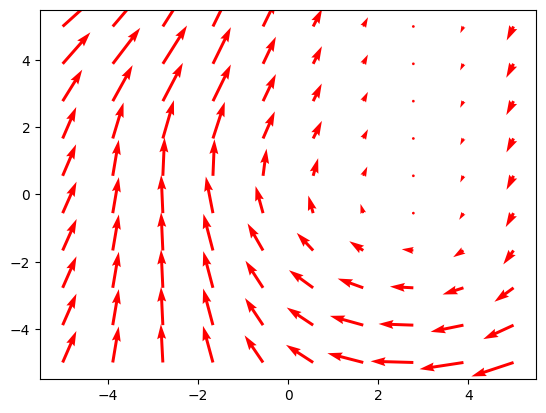

In [179]:
plt.quiver(Y, X, U_pred, V_pred, color='r', label='Prediction')

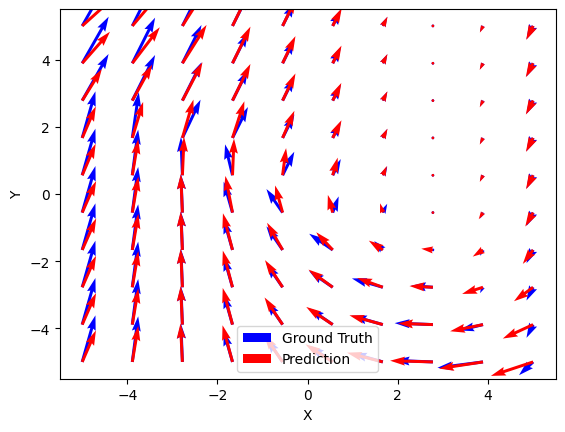

In [157]:
fig, ax = plt.subplots()
plt.xlabel('X')
plt.ylabel('Y')
plt.quiver(Y, X, U, V, color='b', label='Ground Truth')
plt.quiver(Y, X, U_pred, V_pred, color='r', label='Prediction')
ax.legend()